# Quantum Counting Algorithm
Design for qiskit version 2.0.3

Author: Matías Hernández Serrano

Version: 1.0.0

Date: 2025-07-02

This code is based on the Qiskit implementation of the Quantum Counting Algorithm. It uses quantum_algorithms.py, graph_coloring.py and utils.py to 
define the gates needed for the algorithm. The user has to design the topology or just add it's own oracle.

In [1]:
from quantum_algorithms import *
from graph_coloring import *
from utils import *

First we have to create a topology for the algorithm

If you have a previous topology, you can use it later

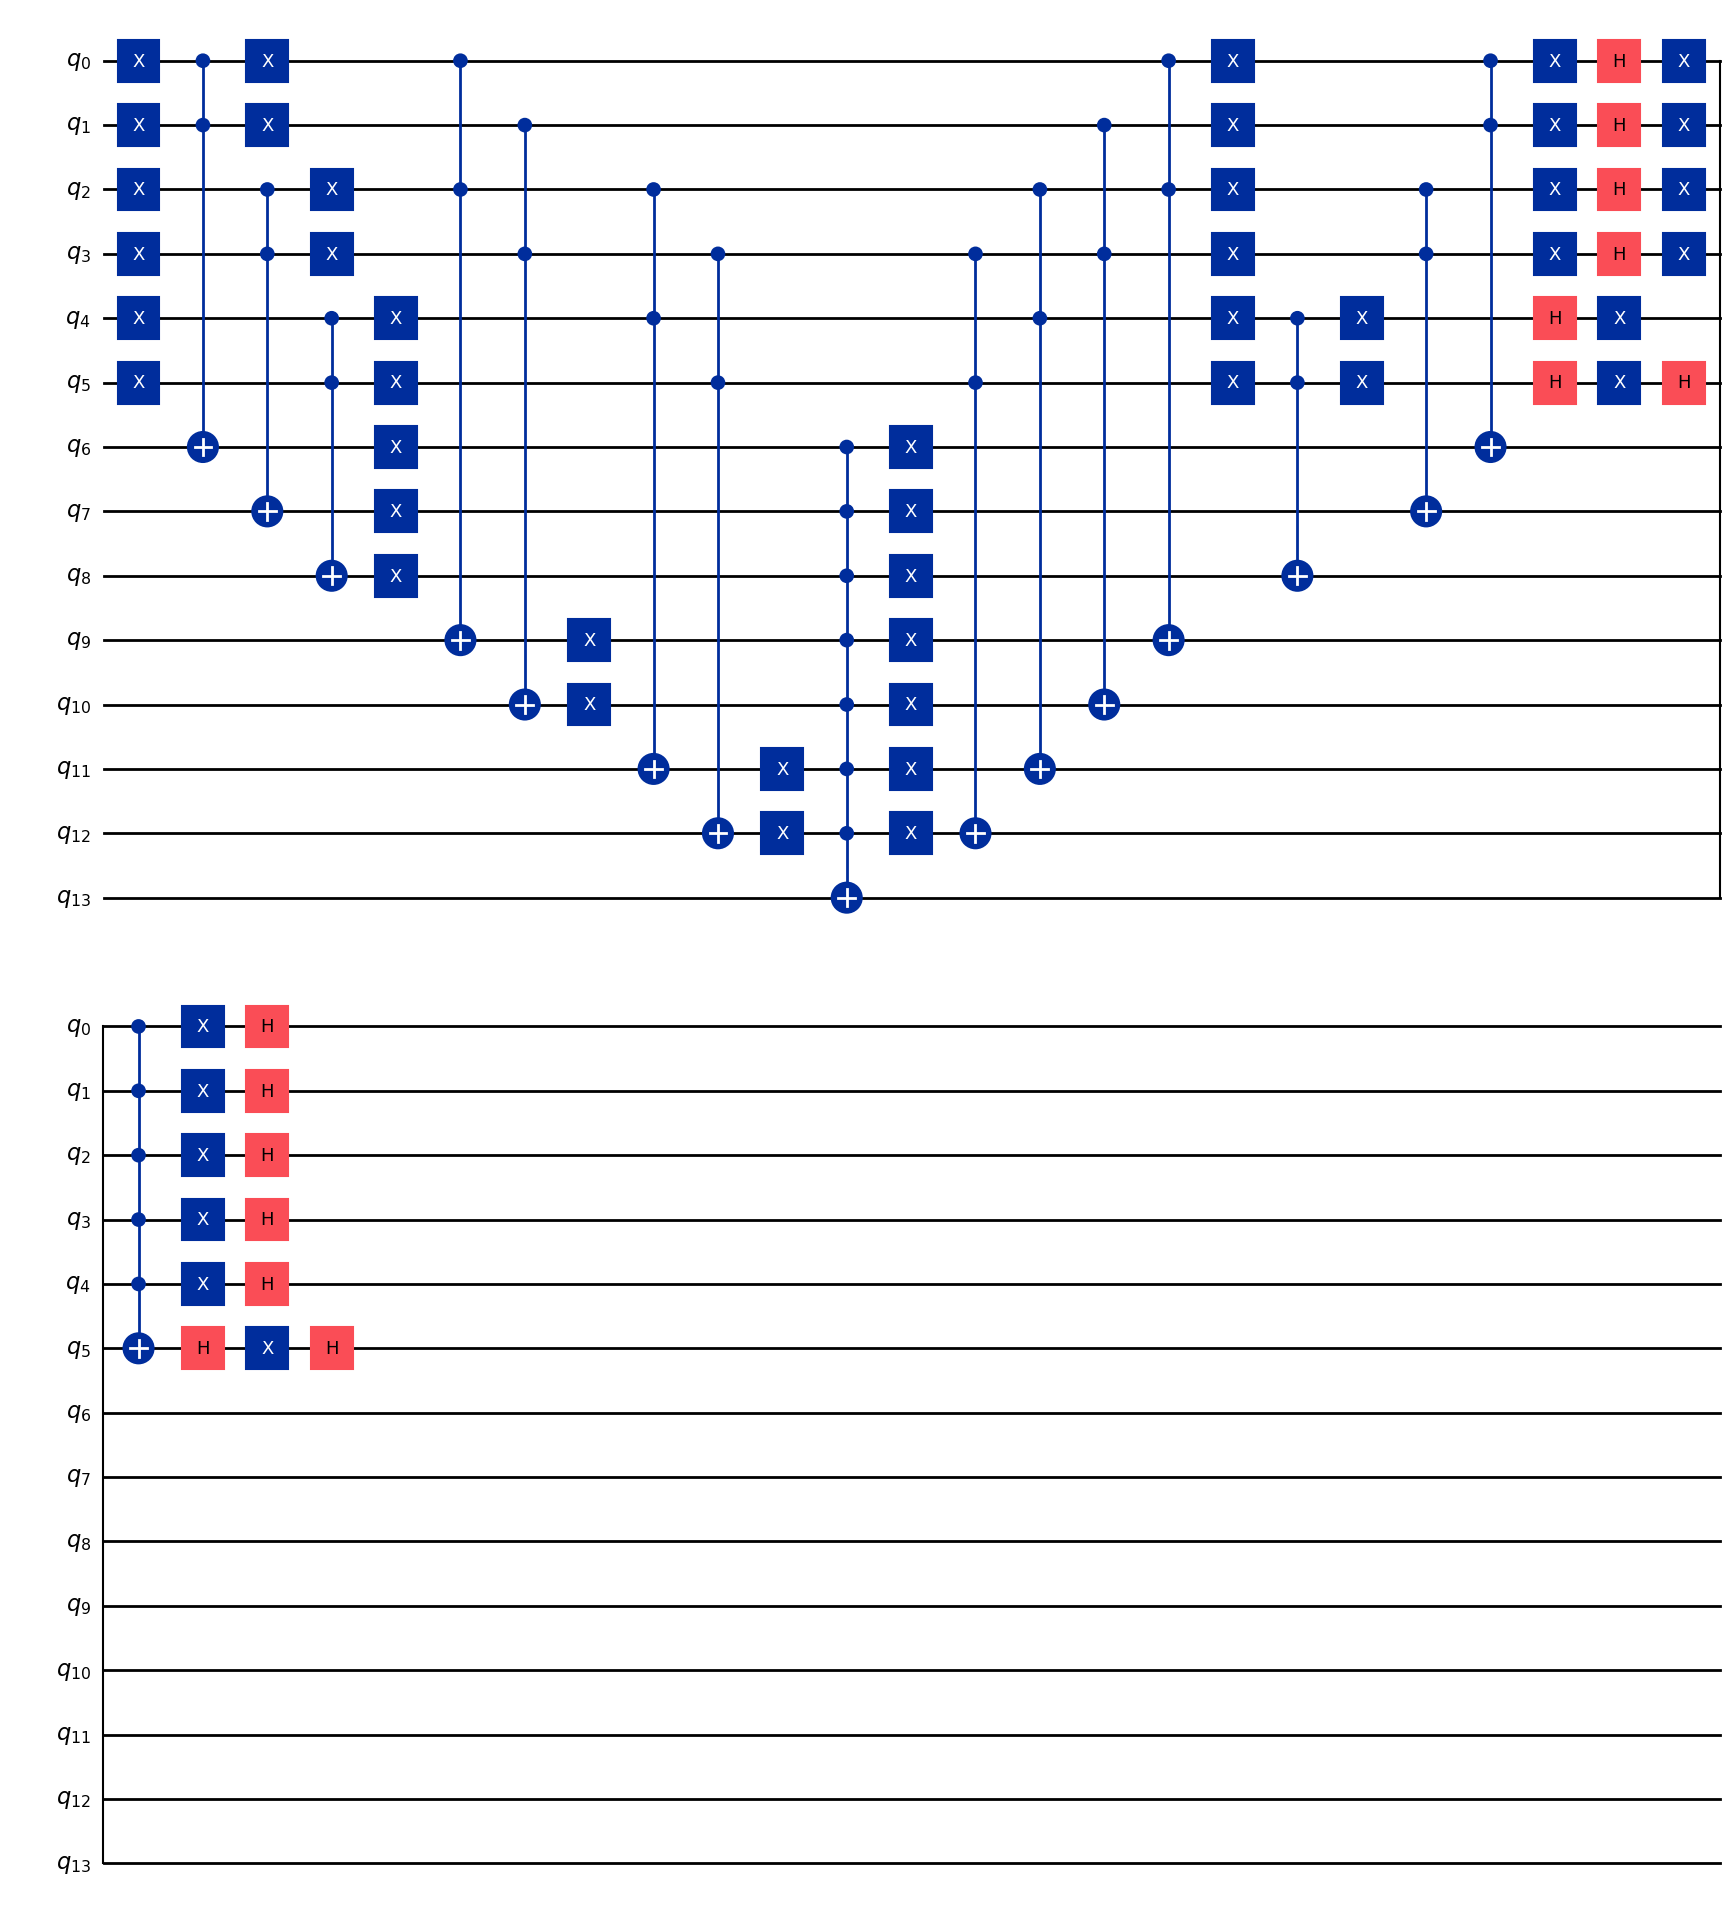

In [2]:
# User variables
nodes = 3
edges = [(0, 1), (1, 2)]
colors = 2

# For this example we will use our own oracle
oracle = graph_coloring_oracle_sat_formula(nodes, edges, colors, use_extendedEdges=False)
oracle.draw(output='mpl')

Now we have to define the QFT size, that will be the number of qubits of the oracle, without the ancilla qubits.

With qubit entries and our oracle, we can create the Quantum Counting Circuit.

To obtain the number of IQFT gates, we can see the definition in gatesUPCT.py file.



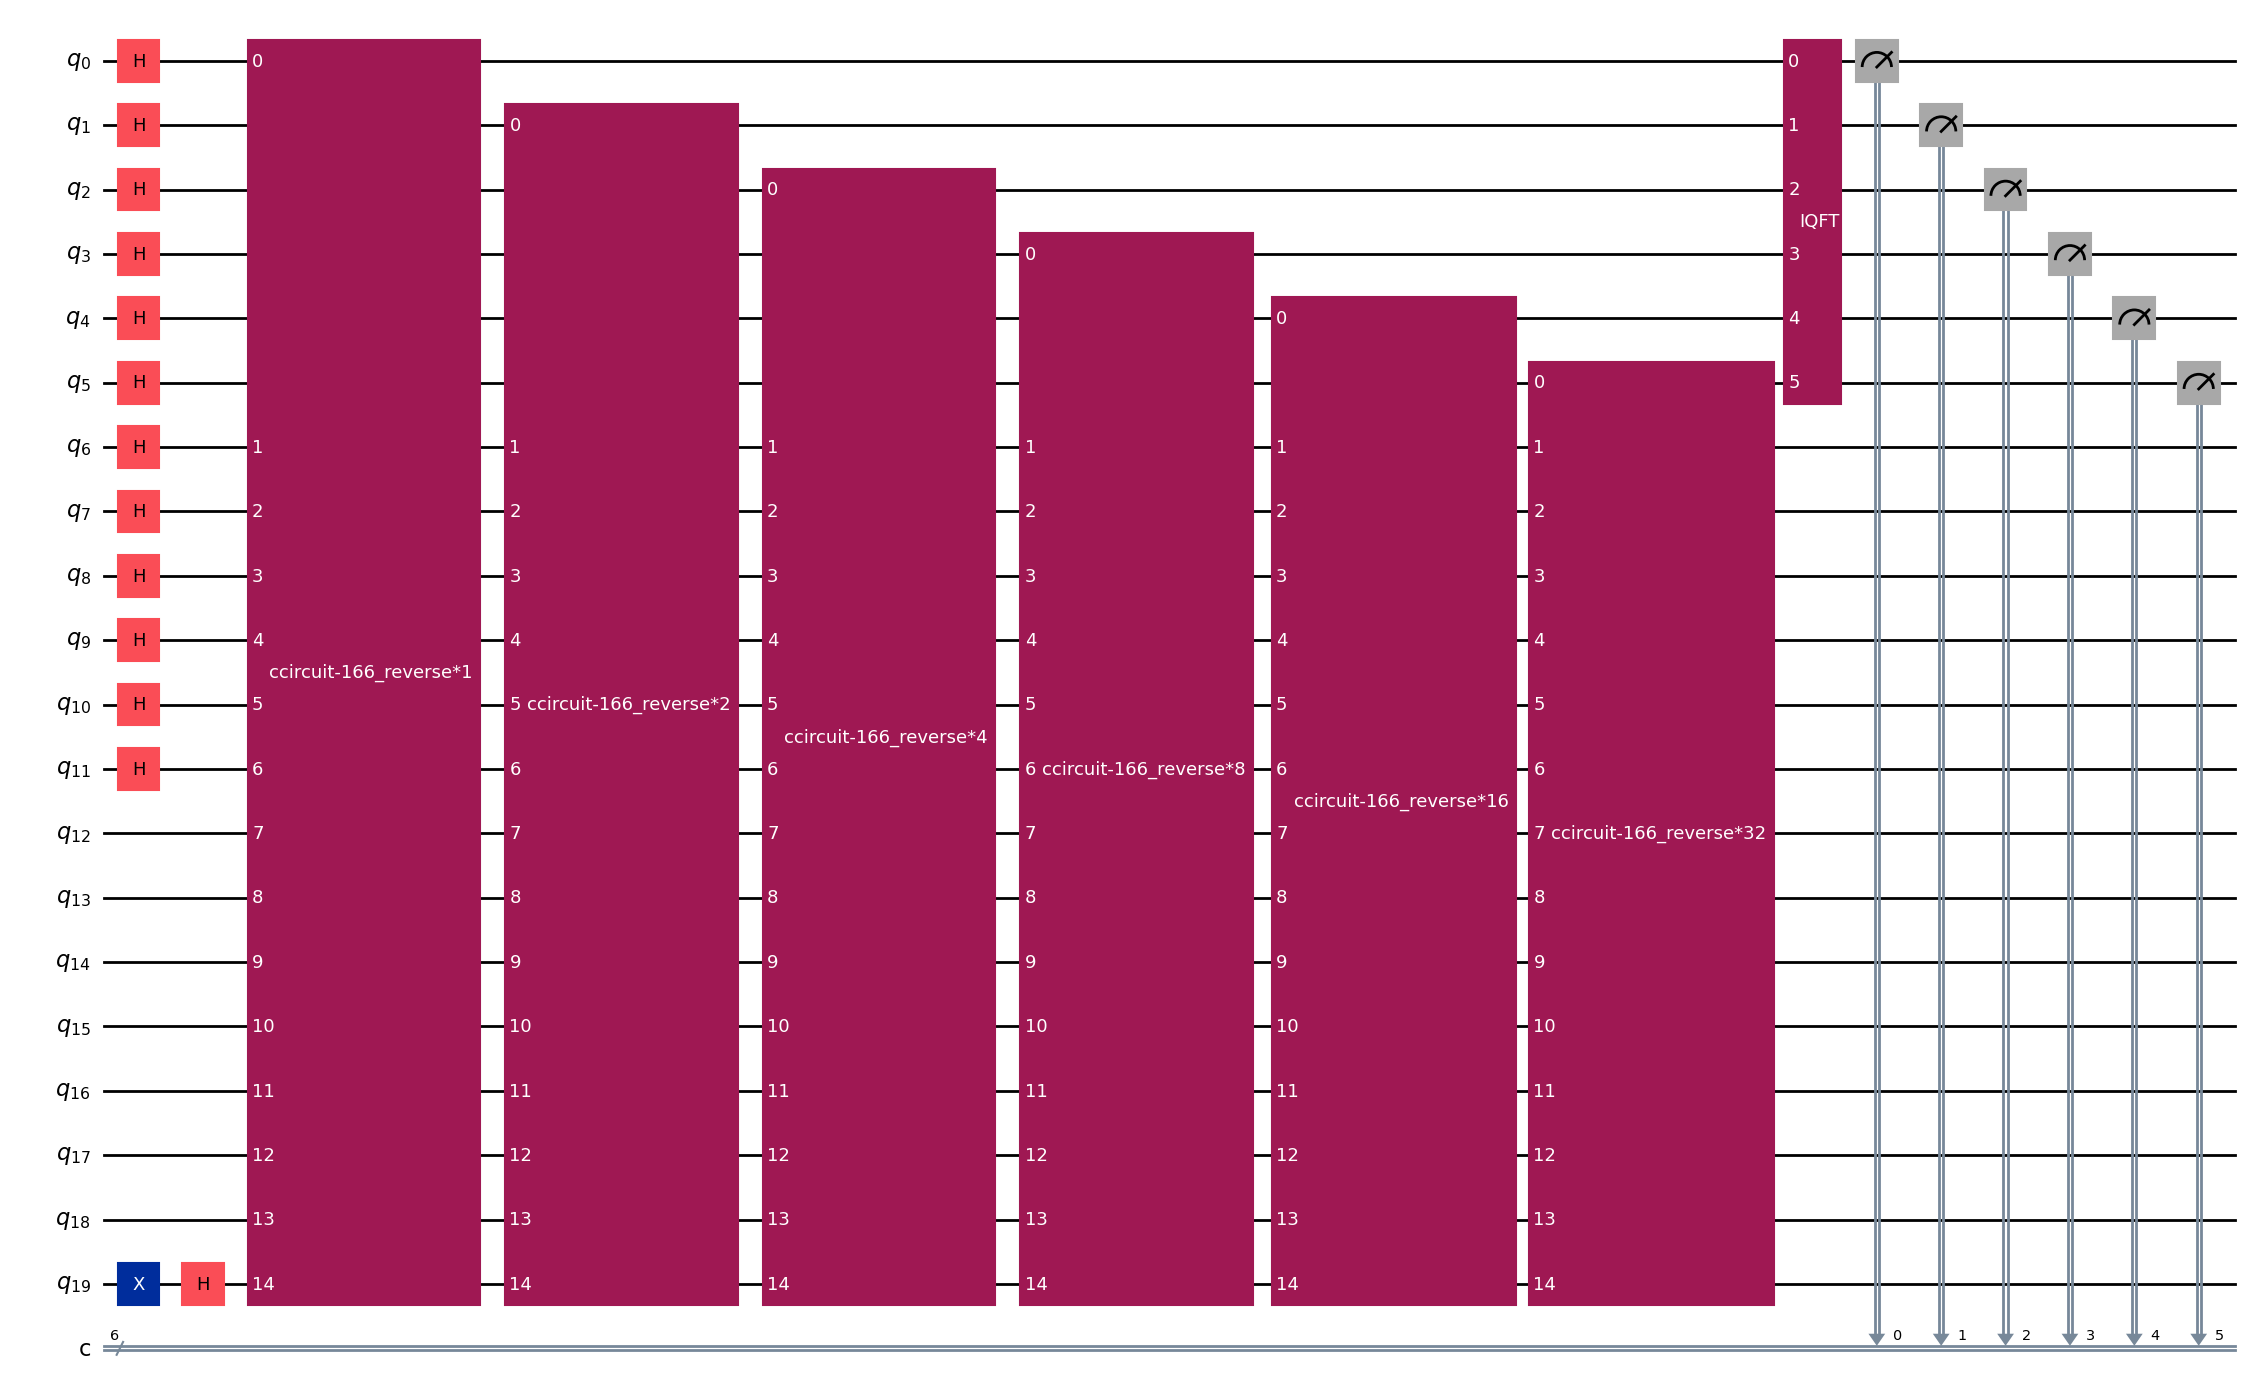

In [3]:
n = nodes * colors
t = math.ceil((n/2) + 3)

countCircuit = create_quantum_counting(oracle, n)
countCircuit.draw(output='mpl', fold = -1)


Now we are ready to simulate the algorithm

c:\Users\matto\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\providers\fake_provider\generic_backend_v2.py:348: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


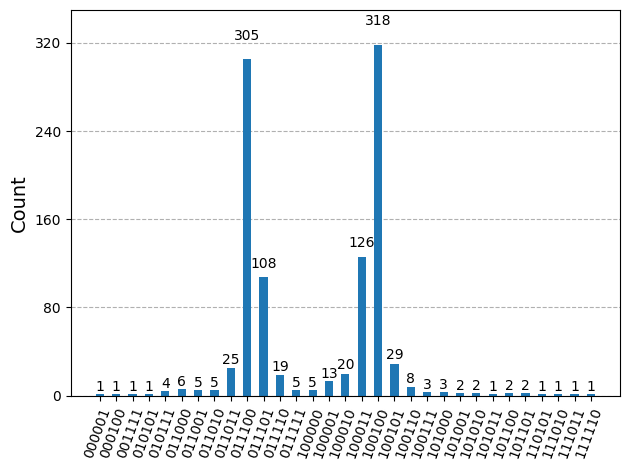

In [4]:
simulator_backend = GenericBackendV2(num_qubits=t + oracle.num_qubits)
pm = generate_preset_pass_manager(backend=simulator_backend, optimization_level=2)
circuit = pm.run(countCircuit)
job = simulator_backend.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)


Finally, we get the most frequent value from counts1, which is the integer j that QPE returns

In [5]:
n=6
t=6
freq = counts.most_frequent()
j = int(freq,2)


# Number of marked elements! Our main goal
m = round(2**(n)*(math.sin(math.pi*(j/(2**t))-math.pi/2)**2))
print ("Number of solutions: ")
print (m)

Number of solutions: 
2
